In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

exact_polytopes = True
folder_name = "m_4_r_3"
base_path = "data/"
base_filename = "normalize" #more_data #generalization_max_1000 #generalization #normalize #encoding 
max_experiments = 10

def find_filename(base_filename):
    i = 1
    while True:
        file_name = base_filename + "_" + "run" + "_" + str(i)
        if not os.path.exists("./runs/" + file_name + ".csv"):
            return i-1
        i += 1
        

run_id = find_filename(base_filename)
vector_data = []
vector_size = min(max_experiments, run_id)
vector_size = 1 if vector_size <= 0 else vector_size
print("Run ID: ", run_id)
print("Vector Size: ", vector_size)

Run ID:  2
Vector Size:  2


In [3]:

file_name = "/exact_politopes" if exact_polytopes else "/all_politopes"

x = np.load(base_path + folder_name + file_name + "_x.npy", allow_pickle=True)
y = np.load(base_path + folder_name + file_name+ "_y.npy", allow_pickle=True)


for i in range(run_id, run_id - vector_size, -1):
    tmp_name = base_filename + "_" + "run" + "_" + str(i) + ".csv"
    tmp_data = pd.read_csv("./runs/" + tmp_name)
    vector_data.append(tmp_data)

print("Mean: ", np.mean(y))
print("Std: ", np.std(y))
print("Std squared: ", np.mean(np.std(y)**2))

Mean:  251.6313172081867
Std:  144.3172390842364
Std squared:  20827.465496896653


In [4]:
"""y_cut = y#[:1000]
y_cut = y_cut.astype(float)

n_items = round(50/5)
frequency = np.zeros(n_items)
for y_item in range(len(y_cut)):
    frequency[round(y_cut[y_item]/5)- 1] += 1



df_y_grouped = pd.DataFrame([range(n_items), frequency], index=["y", "frequency"]).T
df_y_grouped.to_csv("data/" + folder_name + "/y_grouped.csv")

figure2, ax2 = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[0])
sns.lineplot(data=df_y_grouped[df_y_grouped["y"]< 200], x="y", y="frequency", ax=ax2[1])

plt.show()
"""

'y_cut = y#[:1000]\ny_cut = y_cut.astype(float)\n\nn_items = round(50/5)\nfrequency = np.zeros(n_items)\nfor y_item in range(len(y_cut)):\n    frequency[round(y_cut[y_item]/5)- 1] += 1\n\n\n\ndf_y_grouped = pd.DataFrame([range(n_items), frequency], index=["y", "frequency"]).T\ndf_y_grouped.to_csv("data/" + folder_name + "/y_grouped.csv")\n\nfigure2, ax2 = plt.subplots(2, 1, figsize=(12, 10))\nsns.lineplot(data=df_y_grouped, x="y", y="frequency", ax=ax2[0])\nsns.lineplot(data=df_y_grouped[df_y_grouped["y"]< 200], x="y", y="frequency", ax=ax2[1])\n\nplt.show()\n'

In [5]:
"""#Group y in values of 10
y_cut = y #[:1000]

df_y_grouped = pd.DataFrame([y_cut], index=["y"]).T

figure2, ax2 = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(data=df_y_grouped, y="y", ax=ax2)
ax2.set_yscale('log')

plt.show()"""

'#Group y in values of 10\ny_cut = y #[:1000]\n\ndf_y_grouped = pd.DataFrame([y_cut], index=["y"]).T\n\nfigure2, ax2 = plt.subplots(1, 1, figsize=(8, 5))\nsns.boxplot(data=df_y_grouped, y="y", ax=ax2)\nax2.set_yscale(\'log\')\n\nplt.show()'

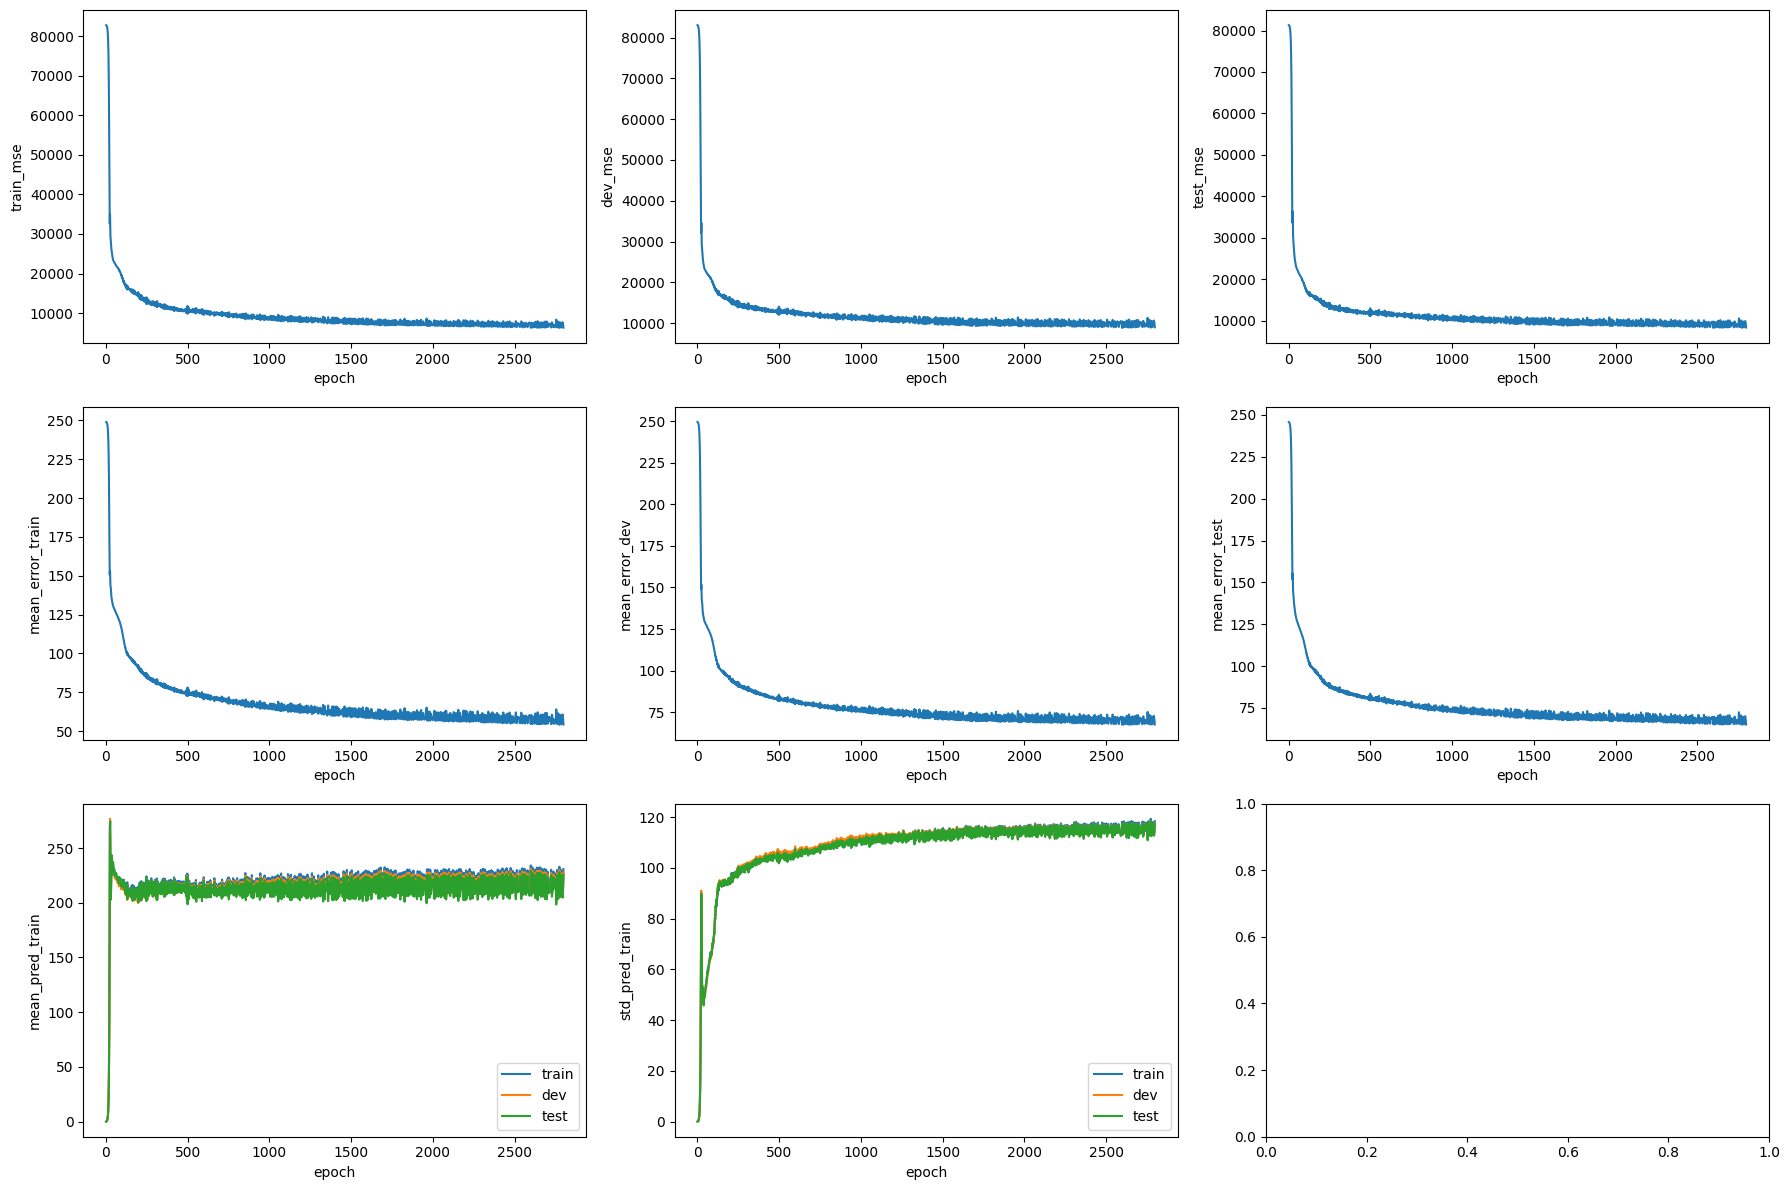

In [6]:
#Last run results

figure2, ax2 = plt.subplots(3, 3, figsize=(18, 12))

sns.lineplot(data=vector_data[0], x="epoch", y="train_mse", ax=ax2[0, 0])
sns.lineplot(data=vector_data[0], x="epoch", y="dev_mse", ax=ax2[0, 1])
sns.lineplot(data=vector_data[0], x="epoch", y="test_mse", ax=ax2[0, 2])


sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_train", ax=ax2[1, 0])
sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_dev", ax=ax2[1, 1])
sns.lineplot(data=vector_data[0], x="epoch", y="mean_error_test", ax=ax2[1, 2])

sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_train", ax=ax2[2, 0], label="train")
sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_dev", ax=ax2[2, 0], label="dev")
sns.lineplot(data=vector_data[0], x="epoch", y="mean_pred_test", ax=ax2[2, 0], label="test")

sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_train", ax=ax2[2, 1], label="train")
sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_dev", ax=ax2[2, 1], label="dev")
sns.lineplot(data=vector_data[0], x="epoch", y="std_pred_test", ax=ax2[2, 1], label="test")

figure2.tight_layout()



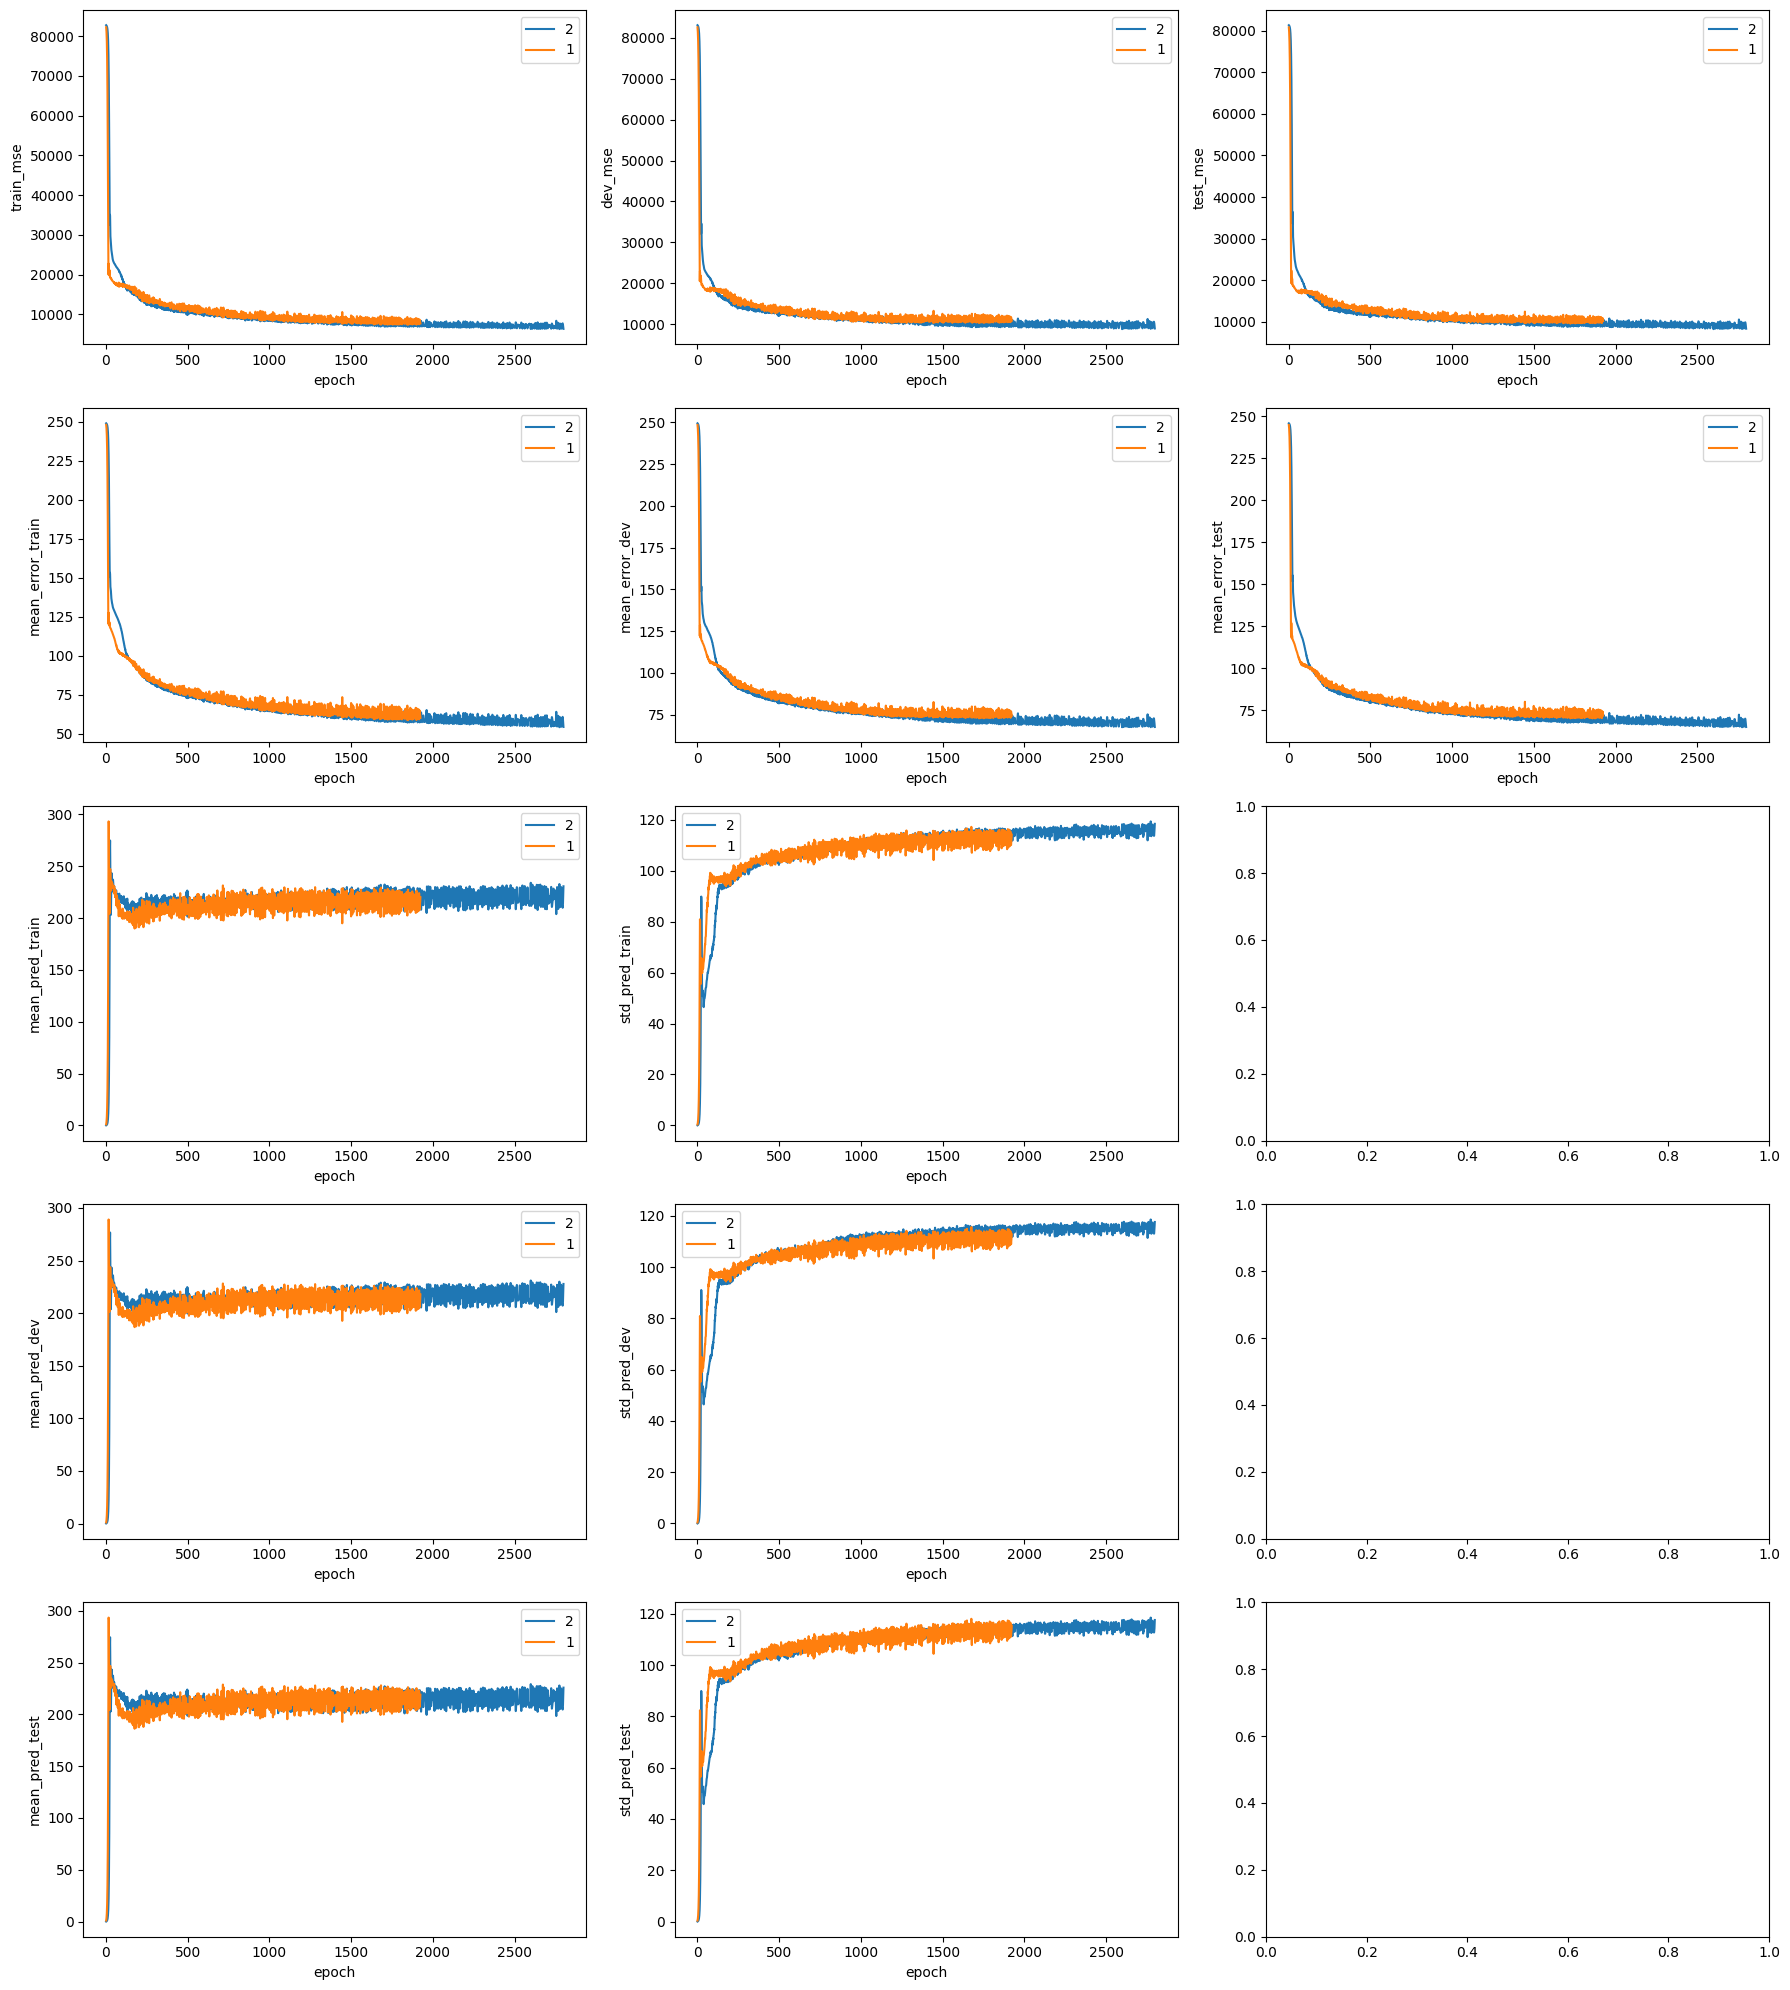

In [7]:
figure2, ax2 = plt.subplots(5, 3, figsize=(18, 20))

for i in range(vector_size):
    sns.lineplot(data=vector_data[i], x="epoch", y="train_mse", ax=ax2[0, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="dev_mse", ax=ax2[0, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="test_mse", ax=ax2[0, 2], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_train", ax=ax2[1, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_dev", ax=ax2[1, 1], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_error_test", ax=ax2[1, 2], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_train", ax=ax2[2, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_train", ax=ax2[2, 1], label=run_id - i)

    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_dev", ax=ax2[3, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_dev", ax=ax2[3, 1], label=run_id - i)
    
    sns.lineplot(data=vector_data[i], x="epoch", y="mean_pred_test", ax=ax2[4, 0], label=run_id - i)
    sns.lineplot(data=vector_data[i], x="epoch", y="std_pred_test", ax=ax2[4, 1], label=run_id - i)

figure2.tight_layout()

